In [1]:
import xarray as xr
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, LogNorm
import warnings
warnings.filterwarnings("ignore")

from glob import glob

from rasterio.enums import Resampling
import rioxarray as rio
import cmocean
from scipy import stats

In [2]:
def reproject_m(df_src, df_dest):
    df_src = df_src.rename({'lat': 'y', 'lon': 'x'}).transpose('y', 'x')
    df_dest = df_dest.rename({'lat': 'y', 'lon': 'x'}).transpose('y', 'x')
    df_src.rio.write_crs("EPSG:4326", inplace = True)
    df_dest.rio.write_crs("EPSG:4326", inplace = True)
    df_out = df_src.rio.reproject_match(df_dest, resampling = Resampling.average)
    return df_out.rename({'y': 'lat', 'x': 'lon'})

grd = xr.open_dataset('/staging/leuven/stg_00024/OUTPUT/devond/S1_ML_project/DATA/time_independent_var/all_static_var.nc').transpose('lat','lon').grid


In [3]:
all_shap1 = xr.open_dataset('/staging/leuven/stg_00024/OUTPUT/devond/S1_ML_project/OUTPUT/shap_maps/year_avg/all_shap_2018.nc')
SD = xr.open_dataset('/staging/leuven/stg_00024/OUTPUT/devond/S1_ML_project/OUTPUT/shap_maps/year_avg/SD_2018.nc')
SD['grd'] = grd
all_shap1['grd'] = grd

ds2 = xr.open_dataset(f'/staging/leuven/stg_00024/OUTPUT/devond/S1_ML_project/OUTPUT/shap_maps/year_avg/hans_all.nc').transpose('lat','lon')
all_shap = reproject_m(all_shap1, ds2)
all_shap = all_shap.where(all_shap.grd==1)

In [4]:
SD_signal = np.abs(all_shap.aspect_shap.values) + np.abs(all_shap.cr_shap.values)+ np.abs(all_shap.dos_shap.values)+\
np.abs(all_shap.elevation_shap.values) + np.abs(all_shap.fcf_shap.values)+ np.abs(all_shap.lia_shap.values)+\
np.abs(all_shap.sc_perc_shap.values) + np.abs(all_shap.sc_percum_shap.values)+ np.abs(all_shap.slope_shap.values)+\
np.abs(all_shap.snowclass_shap.values) + np.abs(all_shap.tpi_shap.values)+ np.abs(all_shap.vv_shap.values)

rel_cr = np.abs(all_shap.cr_shap.values)/SD_signal
rel_vv = np.abs(all_shap.vv_shap.values)/SD_signal
rel_el = np.abs(all_shap.elevation_shap.values)/SD_signal
rel_scf = np.abs(all_shap.sc_percum_shap.values)/SD_signal
rel_sc = np.abs(all_shap.sc_perc_shap.values)/SD_signal
rel_tpi = np.abs(all_shap.tpi_shap.values)/SD_signal
rel_fcf = np.abs(all_shap.fcf_shap.values)/SD_signal
rel_dos = np.abs(all_shap.dos_shap.values)/SD_signal
rel_asp = np.abs(all_shap.aspect_shap.values)/SD_signal
rel_slo = np.abs(all_shap.slope_shap.values)/SD_signal
rel_snowclass = np.abs(all_shap.snowclass_shap.values)/SD_signal
rel_lia = np.abs(all_shap.lia_shap.values)/SD_signal

In [5]:
print(np.nanmean(rel_scf))
print(np.nanmean(rel_cr))
print(np.nanmean(rel_el))
print(np.nanmean(rel_vv))
print(np.nanmean(rel_tpi))
print(np.nanmean(rel_slo))
print(np.nanmean(rel_asp))
print(np.nanmean(rel_snowclass))
print(np.nanmean(rel_lia))
print(np.nanmean(rel_sc))
print(np.nanmean(rel_dos))
print(np.nanmean(rel_fcf))


0.29376498
0.07697225
0.16857445
0.056125484
0.02768793
0.021801263
0.03552639
0.10525943
0.0053370027
0.13527766
0.037556197
0.03611695


In [18]:
SD2 = SD.where(SD.grd==1).SD
SD2_np = SD2.values
SD2_np[np.isnan(SD2_np)&(grd.values==1)] = 0

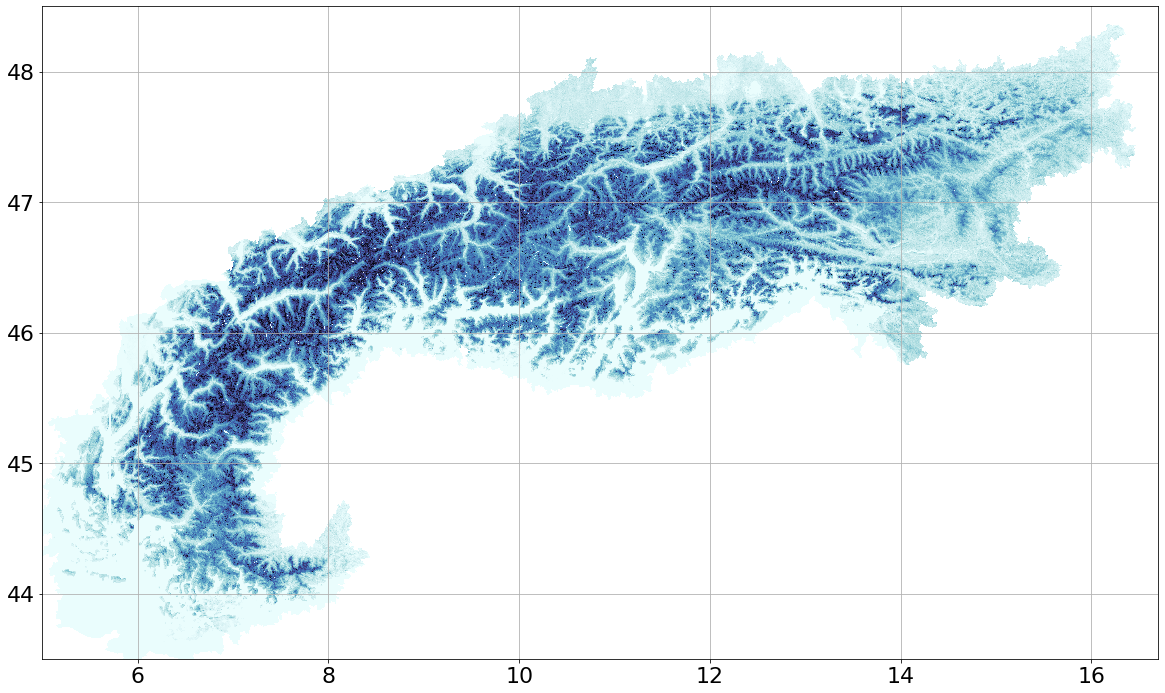

In [15]:
fig, ax = plt.subplots(1,1,figsize = (20,12))

plt.pcolormesh(SD2.lon, SD2.lat, SD2_np, cmap = cmocean.cm.ice_r, vmin = 0, vmax = 3)
plt.grid()
ax.set_xlim([5, 16.7])
ax.set_ylim([43.5, 48.5])
ax.tick_params(axis='x', labelsize=22)
ax.tick_params(axis='y', labelsize=22)
plt.savefig('SD_map.png', dpi = 300, bbox_inches = 'tight')

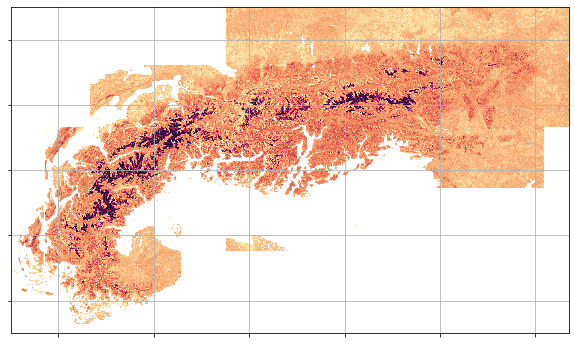

In [13]:
fig, ax = plt.subplots(1,1,figsize = (10,6))

plt.pcolormesh(all_shap.lon, all_shap.lat, rel_cr, cmap = cmocean.cm.matter, vmin = 0, vmax = 0.25)
plt.grid()
ax.set_xlim([5, 16.7])
ax.set_ylim([43.5, 48.5])
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.savefig('cr_shap_map.png', dpi = 300, bbox_inches = 'tight')

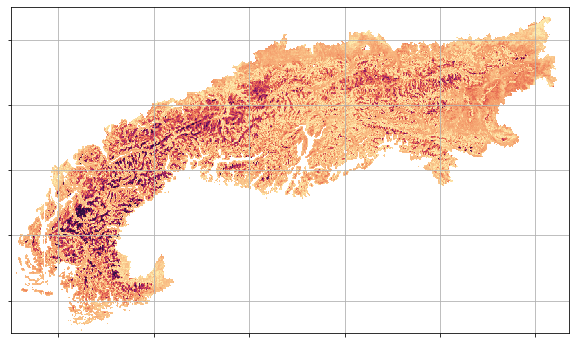

In [11]:
fig, ax = plt.subplots(1,1,figsize = (10,6))

plt.pcolormesh(all_shap.lon, all_shap.lat, rel_vv, cmap = cmocean.cm.matter, vmin = 0, vmax = 0.25)
plt.grid()
ax.set_xlim([5, 16.7])
ax.set_ylim([43.5, 48.5])
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.savefig('vv_shap_map.png', dpi = 300, bbox_inches = 'tight')

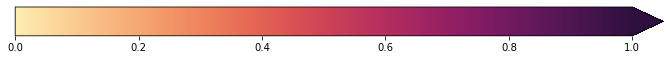

In [93]:
import matplotlib as mpl
fig = plt.figure(figsize = (10,4))
ax = fig.add_axes([0.05, 0.80, 0.9, 0.1])

cb = mpl.colorbar.ColorbarBase(ax, orientation='horizontal', 
                               cmap = cmocean.cm.matter, extend = 'max')
# cb.set_label('Point density', fontsize = 18)
cb.set_ticks([0,0.2,0.4,0.6,0.8,1])
# cb.set_ticklabels(['$1$','$10$','$100$'], fontsize = 14)
# cb.set_label('Point density', fontsize = 18)
plt.savefig('SHAP_cb.png', bbox_inches='tight', transparent = True, dpi = 300)

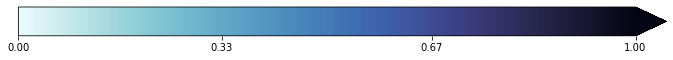

In [94]:
fig = plt.figure(figsize = (10,4))
ax = fig.add_axes([0.05, 0.80, 0.9, 0.1])

cb = mpl.colorbar.ColorbarBase(ax, orientation='horizontal', 
                               cmap = cmocean.cm.ice_r, extend = 'max')
# cb.set_label('Point density', fontsize = 18)
cb.set_ticks([0,0.33,0.67,1])
# cb.set_ticklabels(['$1$','$10$','$100$'], fontsize = 14)
# cb.set_label('Point density', fontsize = 18)
plt.savefig('SD_cb.png', bbox_inches='tight', transparent = True, dpi = 300)

## CR + VV with shap

In [6]:
cr_color = '#af3a82ff'
vv_color = '#e67956ff'
scf_color = '#29294fff'
el_color = '#6598beff'
tpi_color = '#eeb946ff'
fcf_color = '#eeb946ff'

In [7]:
static = xr.open_dataset('/staging/leuven/stg_00024/OUTPUT/devond/S1_ML_project/DATA/time_independent_var/all_static_var.nc').transpose('lat','lon')


In [8]:
cr = xr.open_dataset('/staging/leuven/stg_00024/OUTPUT/devond/S1_ML_project/OUTPUT/shap_maps/year_avg/S1_2018.nc').cr_scaled.values
cr_shap = all_shap1.cr_shap.values
vv = xr.open_dataset('/staging/leuven/stg_00024/OUTPUT/devond/S1_ML_project/OUTPUT/shap_maps/year_avg/vv_scaled_2018.nc').vv_scaled.values
vv_shap = all_shap1.vv_shap.values

x = np.arange(-8,8,0.5)
cr_mean, cr_n, cr_std = list(), list(), list()
vv_mean, vv_n, vv_std = list(), list(), list()
for v in x:
    temp = cr_shap[(cr >= v)&(cr<v+0.5)]
    cr_mean.append(np.nanmean(temp))
    cr_n.append(temp[~np.isnan(temp)].shape[0])
    cr_std.append(np.nanstd(temp))
    
    temp = vv_shap[(vv >= v)&(vv<v+0.5)]
    vv_mean.append(np.nanmean(temp))
    vv_n.append(temp[~np.isnan(temp)].shape[0])
    vv_std.append(np.nanstd(temp))
    
cr_mean = np.asarray(cr_mean)
cr_n = np.asarray(cr_n)
cr_std = np.asarray(cr_std)

vv_mean = np.asarray(vv_mean)
vv_n = np.asarray(vv_n)
vv_std = np.asarray(vv_std)


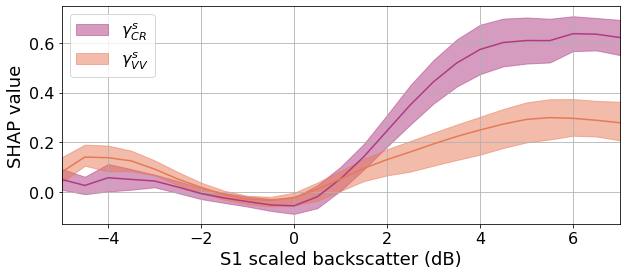

In [9]:
fig, ax = plt.subplots(1,1, figsize = (10,4))
plt.fill_between(np.arange(-8,8,0.5), cr_mean-cr_std, cr_mean+cr_std, color = cr_color, alpha = 0.5, label = '$\gamma_{CR}^s$')
plt.fill_between(np.arange(-8,8,0.5), vv_mean-cr_std, vv_mean+vv_std, color = vv_color, alpha = 0.5, label = '$\gamma_{VV}^s$')
plt.plot(np.arange(-8,8,0.5), cr_mean, color = cr_color)
plt.plot(np.arange(-8,8,0.5), vv_mean, color = vv_color)
plt.grid()

ax.set_xlim([-5,7])
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.set_xlabel('S1 scaled backscatter (dB)', fontsize = 18)
ax.set_ylabel('SHAP value', fontsize = 18)
ax.legend(fontsize = 16)
plt.savefig('cr_vv_shap.png', dpi = 300, bbox_inches = 'tight')

# plt.plot(np.arange(-8,8,0.5), cr_mean)



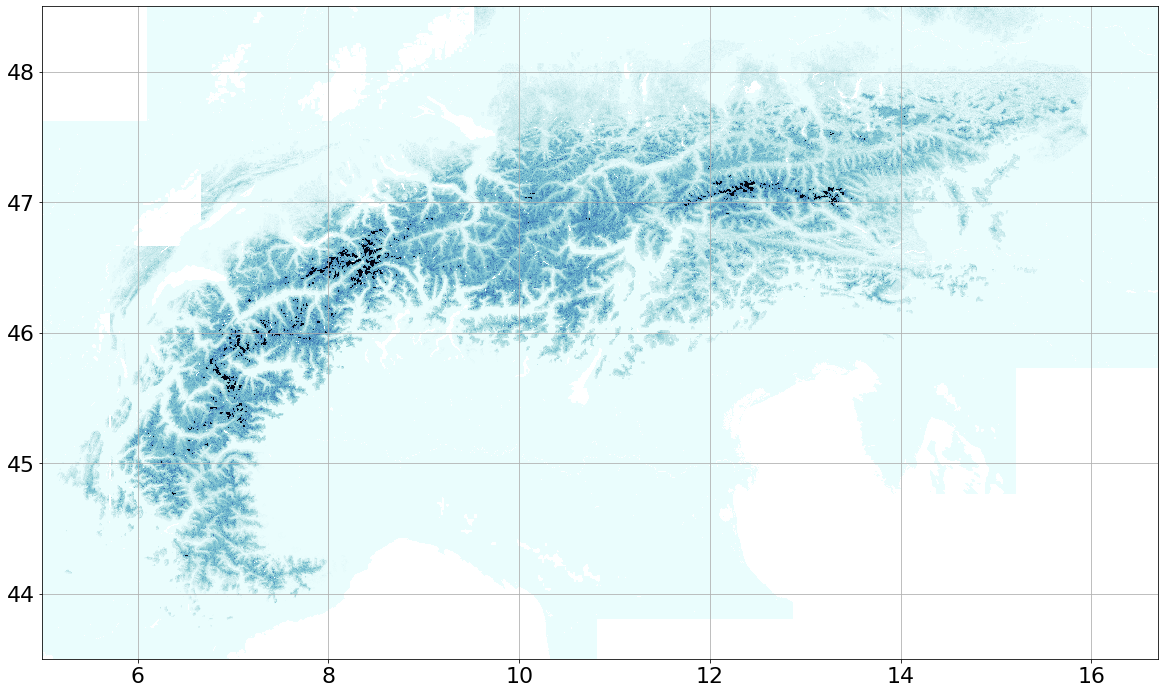

In [89]:
cr2 = np.copy(cr)
cr2[cr2 < 4] = np.nan
fig, ax = plt.subplots(1,1,figsize = (20,12))
plt.pcolormesh(all_shap.lon, all_shap.lat, SD, cmap = cmocean.cm.ice_r, vmin = 0, vmax = 6)
plt.pcolormesh(all_shap.lon, all_shap.lat, cr2, cmap = cmocean.cm.ice_r, vmin = 0, vmax = 3)
plt.grid()
ax.set_xlim([5, 16.7])
ax.set_ylim([43.5, 48.5])
ax.tick_params(axis='x', labelsize=22)
ax.tick_params(axis='y', labelsize=22)


In [107]:
SD[(~np.isnan(SD))].shape

(50062721,)

In [108]:
13123/50062721

0.0002621311774084353

In [94]:
elv = xr.open_dataset('/staging/leuven/stg_00024/OUTPUT/devond/S1_ML_project/DATA/time_independent_var/all_static_var.nc').transpose('lat','lon').dem.values

In [102]:
SD[(cr>4)&(~np.isnan(SD))].max()

4.367862701416016

In [103]:
np.nanmax(SD)

5.059025406837463

In [79]:
print(stats.linregress(cr[(cr>1)&(cr<4)&(~np.isnan(SD))], SD[(cr>1)&(cr<4)&(~np.isnan(SD))]))
print(stats.linregress(cr[(cr>4)&(~np.isnan(SD))], SD[(cr>4)&(~np.isnan(SD))]))

LinregressResult(slope=0.3185887249164197, intercept=1.0331968313786146, rvalue=0.4366074906165754, pvalue=0.0, stderr=0.00039106451344957484, intercept_stderr=0.000854787805224806)
LinregressResult(slope=0.09021163218092472, intercept=1.8623980163319154, rvalue=0.09799132602397051, pvalue=2.752046395506747e-277, stderr=0.002529266516898601, intercept_stderr=0.011431552753601483)


In [91]:
print(stats.linregress(vv[(vv>1)&(vv<5)&(~np.isnan(SD))], SD[(vv>1)&(vv<5)&(~np.isnan(SD))]))
print(stats.linregress(vv[(vv>5)&(vv<7)&(~np.isnan(SD))], SD[(vv>5)&(vv<7)&(~np.isnan(SD))]))

LinregressResult(slope=0.08536471582678183, intercept=0.579582280122098, rvalue=0.09674450777309292, pvalue=0.0, stderr=0.0003060422987515591, intercept_stderr=0.000634243557955272)
LinregressResult(slope=0.28365180294637443, intercept=-0.06447322157532343, rvalue=0.19938471421666723, pvalue=0.0, stderr=0.0057191722439569985, intercept_stderr=0.03257227947559697)


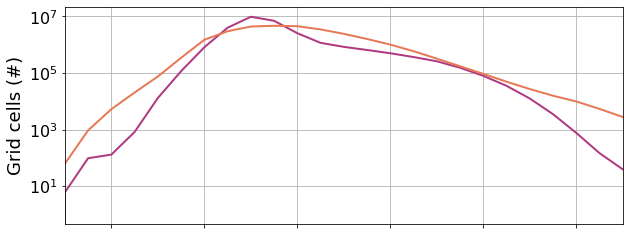

In [44]:
fig, ax = plt.subplots(1,1, figsize = (10,4))
ax.plot(np.arange(-8,8,0.5), cr_n, color = cr_color, linewidth = 2)
ax.plot(np.arange(-8,8,0.5), vv_n, color = vv_color, linewidth = 2)
ax.set_xlim([-5,7])
ax.set_yscale('log')

ax.set_xticklabels([])
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.set_ylabel('Grid cells (#)', fontsize = 18)
ax.grid()
plt.savefig('s1_n.png', dpi = 300, bbox_inches = 'tight')

In [10]:
grd = xr.open_dataset('/staging/leuven/stg_00024/OUTPUT/devond/S1_ML_project/DATA/time_independent_var/all_static_var.nc').transpose('lat','lon').grid.values

In [11]:
all_shap = xr.open_dataset('/staging/leuven/stg_00024/OUTPUT/devond/S1_ML_project/OUTPUT/shap_maps/year_avg/all_shap_2018.nc')

SD_signal = np.abs(all_shap.aspect_shap.values) + np.abs(all_shap.cr_shap.values)+ np.abs(all_shap.dos_shap.values)+\
np.abs(all_shap.elevation_shap.values) + np.abs(all_shap.fcf_shap.values)+ np.abs(all_shap.lia_shap.values)+\
np.abs(all_shap.sc_perc_shap.values) + np.abs(all_shap.sc_percum_shap.values)+ np.abs(all_shap.slope_shap.values)+\
np.abs(all_shap.snowclass_shap.values) + np.abs(all_shap.tpi_shap.values)+ np.abs(all_shap.vv_shap.values)

rel_cr = np.abs(all_shap.cr_shap.values)/SD_signal
rel_vv = np.abs(all_shap.vv_shap.values)/SD_signal
rel_el = np.abs(all_shap.elevation_shap.values)/SD_signal
rel_tpi = np.abs(all_shap.tpi_shap.values)/SD_signal
rel_sc = np.abs(all_shap.sc_perc_shap.values)/SD_signal
rel_scf = np.abs(all_shap.sc_percum_shap.values)/SD_signal
rel_fcf = np.abs(all_shap.fcf_shap.values)/SD_signal

In [12]:
rel_cr[grd==0] = np.nan
rel_vv[grd==0] = np.nan
rel_el[grd==0] = np.nan
rel_tpi[grd==0] = np.nan
rel_sc[grd==0] = np.nan
rel_scf[grd==0] = np.nan
rel_fcf[grd==0] = np.nan

In [13]:
SD = xr.open_dataset('/staging/leuven/stg_00024/OUTPUT/devond/S1_ML_project/OUTPUT/shap_maps/year_avg/SD_2019.nc').SD.values

x = np.arange(0,5.25, 0.25)
cr, vv, el, scf, tpi, n = list(), list(), list(), list(), list(), list()
for v in x:
    cr.append(np.nanmean(rel_cr[(SD >= v)&(SD<v+0.25)]))
    vv.append(np.nanmean(rel_vv[(SD >= v)&(SD<v+0.25)]))
    el.append(np.nanmean(rel_el[(SD >= v)&(SD<v+0.25)]))
    scf.append(np.nanmean(rel_scf[(SD >= v)&(SD<v+0.25)]))
    tpi.append(np.nanmean(rel_tpi[(SD >= v)&(SD<v+0.25)]))
    temp = SD[(SD >= v)&(SD<v+0.25)]
    n.append(temp[~np.isnan(temp)].shape[0])
    

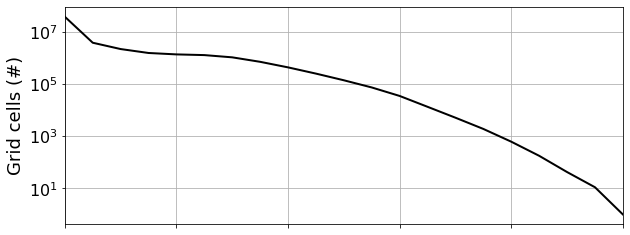

In [110]:
fig, ax = plt.subplots(1,1, figsize = (10,4))
ax.plot(x, n, color = 'k', linewidth = 2)
ax.set_xlim([0,5])
ax.set_yscale('log')

#ax.set_yticks([0,10,20,30])
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.set_ylabel('Grid cells (#)', fontsize = 18)
ax.set_xticklabels([])
ax.grid()
plt.savefig('sd_n.png', dpi = 300, bbox_inches = 'tight')

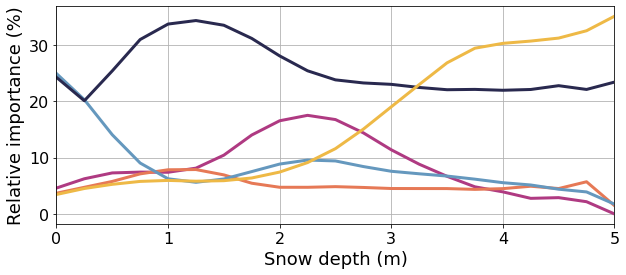

In [111]:
fig, ax = plt.subplots(1,1, figsize = (10,4))
plt.plot(x, np.asarray(cr)*100, color = cr_color, linewidth = 3, label = '$\gamma_{CR}^s$')
plt.plot(x, np.asarray(vv)*100, color = vv_color, linewidth = 3, label = '$\gamma_{VV}^s$')
plt.plot(x, np.asarray(el)*100, color = el_color, linewidth = 3, label = 'Elevation')
plt.plot(x, np.asarray(scf)*100, color = scf_color, linewidth = 3, label = 'SCF')
plt.plot(x, np.asarray(tpi)*100, color = tpi_color, linewidth = 3, label = 'TPI')
plt.grid()

ax.set_xlim([0,5])
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.set_xlabel('Snow depth (m)', fontsize = 18)
ax.set_ylabel('Relative importance (%)', fontsize = 18)
#ax.legend(fontsize = 16)
plt.savefig('withSD.png', dpi = 300, bbox_inches = 'tight')

In [15]:
fcf = xr.open_dataset('/staging/leuven/stg_00024/OUTPUT/devond/S1_ML_project/DATA/time_independent_var/all_static_var.nc').transpose('lat','lon').forest.values

x = np.arange(0,105, 5)
cr, vv, el, scf, fff, n = list(), list(), list(), list(), list(), list()
for v in x:
    cr.append(np.nanmean(rel_cr[(fcf >= v)&(fcf<v+5)&(SD>1.)]))
    vv.append(np.nanmean(rel_vv[(fcf >= v)&(fcf<v+5)&(SD>1.)]))
    el.append(np.nanmean(rel_el[(fcf >= v)&(fcf<v+5)&(SD>1.)]))
    scf.append(np.nanmean(rel_scf[(fcf >= v)&(fcf<v+5)&(SD>1.)]))
    fff.append(np.nanmean(rel_fcf[(fcf >= v)&(fcf<v+5)&(SD>1.)]))
    temp = fcf[(fcf >= v)&(fcf<v+5)&(SD>1.)]
    n.append(temp[~np.isnan(temp)].shape[0])
    

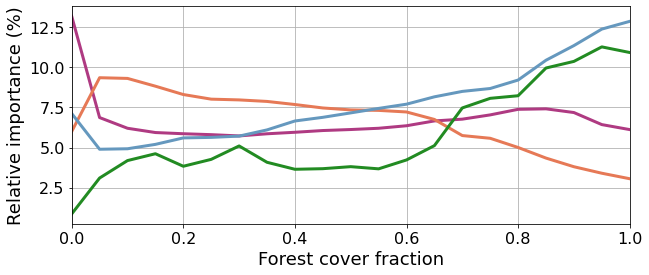

In [16]:
fig, ax = plt.subplots(1,1, figsize = (10,4))
plt.plot(x/100, np.asarray(cr)*100, color = cr_color, linewidth = 3, label = '$\gamma_{CR}^s$')
plt.plot(x/100, np.asarray(vv)*100, color = vv_color, linewidth = 3, label = '$\gamma_{VV}^s$')
plt.plot(x/100, np.asarray(el)*100, color = el_color, linewidth = 3, label = 'Elevation')
plt.plot(x/100, np.asarray(fff)*100, color = 'forestgreen', linewidth = 3, label = 'FCF')
#plt.plot(x, tpi, color = 'violet', linewidth = 2, label = 'TPI')
plt.grid()

ax.set_xlim([0,1])
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.set_xlabel('Forest cover fraction', fontsize = 18)
ax.set_ylabel('Relative importance (%)', fontsize = 18)
#ax.legend(fontsize = 16)
plt.savefig('withfcf.png', dpi = 300, bbox_inches = 'tight')

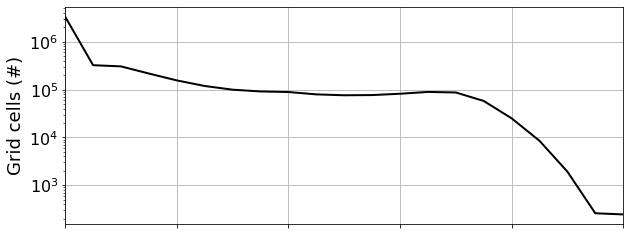

In [51]:
fig, ax = plt.subplots(1,1, figsize = (10,4))
ax.plot(x/100, n, color = 'k', linewidth = 2)
#ax.set_xlim([0,5])
ax.set_yscale('log')

ax.set_xlim([0,1])
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.set_ylabel('Grid cells (#)', fontsize = 18)
ax.set_xticklabels([])
ax.grid()
plt.savefig('fcf_n.png', dpi = 300, bbox_inches = 'tight')

In [14]:
lia = xr.open_dataset('/staging/leuven/stg_00024/OUTPUT/devond/S1_ML_project/OUTPUT/shap_maps/year_avg/lia_2018.nc').lia.values

x = np.arange(0,80, 5)
cr, vv, el, scf, tpi, n = list(), list(), list(), list(), list(), list()
for v in x:
    cr.append(np.nanmean(rel_cr[(lia >= v)&(lia<v+5)&(SD>1.)]))
    vv.append(np.nanmean(rel_vv[(lia >= v)&(lia<v+5)&(SD>1.)]))
    el.append(np.nanmean(rel_el[(lia >= v)&(lia<v+5)&(SD>1.)]))
    scf.append(np.nanmean(rel_scf[(lia >= v)&(lia<v+5)&(SD>1.)]))
    tpi.append(np.nanmean(rel_tpi[(lia >= v)&(lia<v+5)&(SD>1.)]))
    temp = fcf[(lia >= v)&(lia<v+5)&(SD>1.)]
    n.append(temp[~np.isnan(temp)].shape[0])

NameError: name 'fcf' is not defined

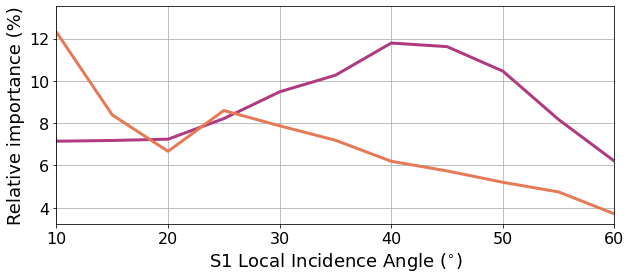

In [49]:
fig, ax = plt.subplots(1,1, figsize = (10,4))
plt.plot(x, np.asarray(cr)*100, color = cr_color, linewidth = 3, label = '$\gamma_{CR}^s$')
plt.plot(x, np.asarray(vv)*100, color = vv_color, linewidth = 3, label = '$\gamma_{VV}^s$')
#plt.plot(x, tpi, color = 'violet', linewidth = 2, label = 'TPI')
plt.grid()

ax.set_xlim([10,60])
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.set_xlabel('S1 Local Incidence Angle ($^{\circ}$)', fontsize = 18)
ax.set_ylabel('Relative importance (%)', fontsize = 18)
#ax.legend(fontsize = 16)
plt.savefig('withlia.png', dpi = 300, bbox_inches = 'tight')

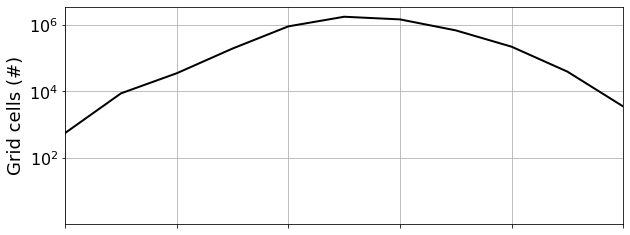

In [32]:
fig, ax = plt.subplots(1,1, figsize = (10,4))
ax.plot(x, n, color = 'k', linewidth = 2)
ax.set_xlim([10,60])
ax.set_yscale('log')

#ax.set_yticks([0,10,20,30])
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.set_ylabel('Grid cells (#)', fontsize = 18)
ax.set_xticklabels([])
ax.grid()
plt.savefig('lia_n.png', dpi = 300, bbox_inches = 'tight')